
# ЛР 1,2. №3376, Константинов Родион Игоревич
# Анализ датасета insurance.csv и кластеризация KMeans.

Мы взяли таблицу с данными про страховые случаи (файл insurance.csv) и сделали две вещи:
1. **Исследовали данные** — чтобы понять, какие там столбцы (например: возраст, пол, вес, курит ли человек, сколько детей и сколько платят), есть ли в данных ошибки, пропуски, странные значения, как распределены числа и какие признаки между собой связаны.
2. **Разбили людей на группы (кластеризовали)** — с помощью алгоритма K‑Means мы попытались автоматически найти похожие группы клиентов (например: молодые без детей с низкими выплатами; курильщики с высокими выплатами и т.п.).


Цель — получить понимание данных и выделить полезные группы клиентов, которые помогают принимать решения (например, для страховой: кому предложить скидку, а кого — отдельно анализировать).


---


### Что именно делает каждая часть ноутбука (простыми словами)


**1. Загрузка данных (`pd.read_csv`)**
- `pd.read_csv(path)` — открывает CSV-файл и превращает его в таблицу (DataFrame). Это как открыть Excel-файл в Python.


**2. Первичный осмотр (`head()`, `shape`)**
- `df.head()` показывает первые несколько строк — быстро видно, какие там столбцы и примеры данных.
- `df.shape` показывает, сколько строк (записей) и столбцов — общая «вес» таблицы.


**3. Описательная статистика (`describe()`)**
- `df.describe()` считает среднее, стандартное отклонение (СКО), минимумы, максимумы и квартилы для числовых столбцов. Это помогает понять типичные значения и разброс.


**4. Визуализации — гистограммы и боксплоты (`sns.histplot`, `sns.boxplot`)**
- **Гистограмма** показывает, как часто встречаются разные значения (напр., сколько людей с возрастом 20, 30 и т.д.).
- **Боксплот** показывает медиану, квартилы и выбросы (очень большие или очень маленькие значения). По боксплоту легко увидеть «экстремумы».


**5. Пропуски и дубликаты (`isnull().sum()`, `drop_duplicates()`)**
- `df.isnull().sum()` считает, где что-то отсутствует. Мы не нашли значительных пропусков.
- `df.drop_duplicates()` удаляет полностью одинаковые строки — полезно, чтобы случайно не считать одну и ту же запись дважды.


**6. Выявление выбросов (IQR и перцентили)**
- *IQR* — интерквартильный размах: разница между 25% и 75% значениями. По правилу IQR можно пометить точки, выходящие далеко за пределы обычного разброса, как выбросы.
- Кроме IQR, мы смотрим на высокий 99‑й перцентиль для `charges` (страховых выплат). Если значение выше 99% других — это очень большое значение и оно может сильно смещать модели. Поэтому для части анализа мы исключили верхние 1% как «экстремумы».


**7. Корреляции (`corr()` и heatmap)**
- `df.corr()` считает, насколько два числовых признака связаны: если одна растёт, растёт ли другая (положительная корреляция) или падает (отрицательная).
- `sns.heatmap()` рисует матрицу корреляций — легко увидеть наиболее связанные признаки. Например, `age` и `charges` оказались положительно связаны.


**8. Добавление новых признаков**
- `age_group`: сгруппировали возраст в категории (молодой, взрослый, старший) — это упрощает анализ.
- `bmi_category`: преобразовали индекс массы тела (BMI) в категории (нормальный, избыточный, ожирение) — так удобнее интерпретировать.
- `charges_per_child`: разделили `charges` на число детей+1, чтобы оценить затраты на семью.


**9. Подготовка для K‑Means (кодирование и стандартизация)**
- K‑Means работает с числами и чувствителен к масштабу. Поэтому:
- Преобразуем `smoker` в 0/1 (число вместо слова).
- Используем `StandardScaler()` — делает так, что каждая колонка имеет среднее 0 и стандартное отклонение 1. Это нужно, чтобы разные величины (возраст 20–70 и расходы в сотнях/тысячах) были сопоставимы.


**10. Подбор числа кластеров (Elbow + Silhouette)**
- **Elbow**: считаем внутрикластерную сумму квадратов (инерцию) для разных k (от 2 до 10). Когда график резко «сгибается» (локоть), это обычно хорошее k.
- **Silhouette score**: оценивает, насколько объекты внутри кластера похожи друг на друга и отличны от других кластеров. Чем ближе к 1 — тем лучше. Мы выбираем k с наилучшим силуэтом.


**11. Обучение K‑Means (`KMeans.fit_predict`)**
- Алгоритм случайно ставит k центров, потом повторно переносит центры в середины групп и пересчитывает, пока кластеры не стабилизируются.
- В результате получаем метку кластера для каждой строки — число от 0 до k-1.


**12. Визуализация кластеров (scatter)**
- Рисуем точки (напр., возраст по оси x и расходы по y) и красим по кластеру — так видно, какие группы получились.


**13. Сохранение результата (`to_csv`)**
- Сохраняем таблицу с новым столбцом `cluster` в `/mnt/data/insurance_with_clusters.csv`.


---


### Почему мы так делаем? (логика шагов)
- **Предобработка** (убрать дубликаты, обработать выбросы) нужна, чтобы «мусор» не портил результаты. Алгоритмы машинного обучения чувствительны к выбросам.
- **Стандартизация** нужна, чтобы признаки с разными единицами измерения не «тянули» модель сильнее.
- **Добавление признаков** (age_group, charges_per_child) — часто полезно дать модели дополнительные компактные описания предметной области: они помогают найти более осмысленные кластеры.
(код сохранения остается прежним)

## 1. Загрузка данных и первичный осмотр

Загрузим insurance.csv и посмотрим первые строки и общую информацию.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Настройки отображения
%matplotlib inline
pd.set_option('display.max_columns', 50)

# Загрузка
path = 'insurance.csv'
df = pd.read_csv(path)

# Первичный просмотр
print('Размер датасета:', df.shape)
df.head()


Размер датасета: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 2. Описание атрибутов

Датасет insurance.csv обычно содержит следующие поля:
- `age` — возраст застрахованного (числовой)
- `sex` — пол (female/male) (категориальный)
- `bmi` — индекс массы тела (числовой)
- `children` — число детей/зависимых (целое)
- `smoker` — был ли курильщиком (yes/no) (категориальный)
- `region` — регион проживания (категориальный)
- `charges` — страховые выплаты (charges) — целевая величина затрат (числовой)

## 3. Статистический анализ: среднее, СКО, гистограммы

Вычислим основные статистики для числовых признаков и построим гистограммы и боксплоты.

Числовые столбцы: ['age', 'bmi', 'children', 'charges']


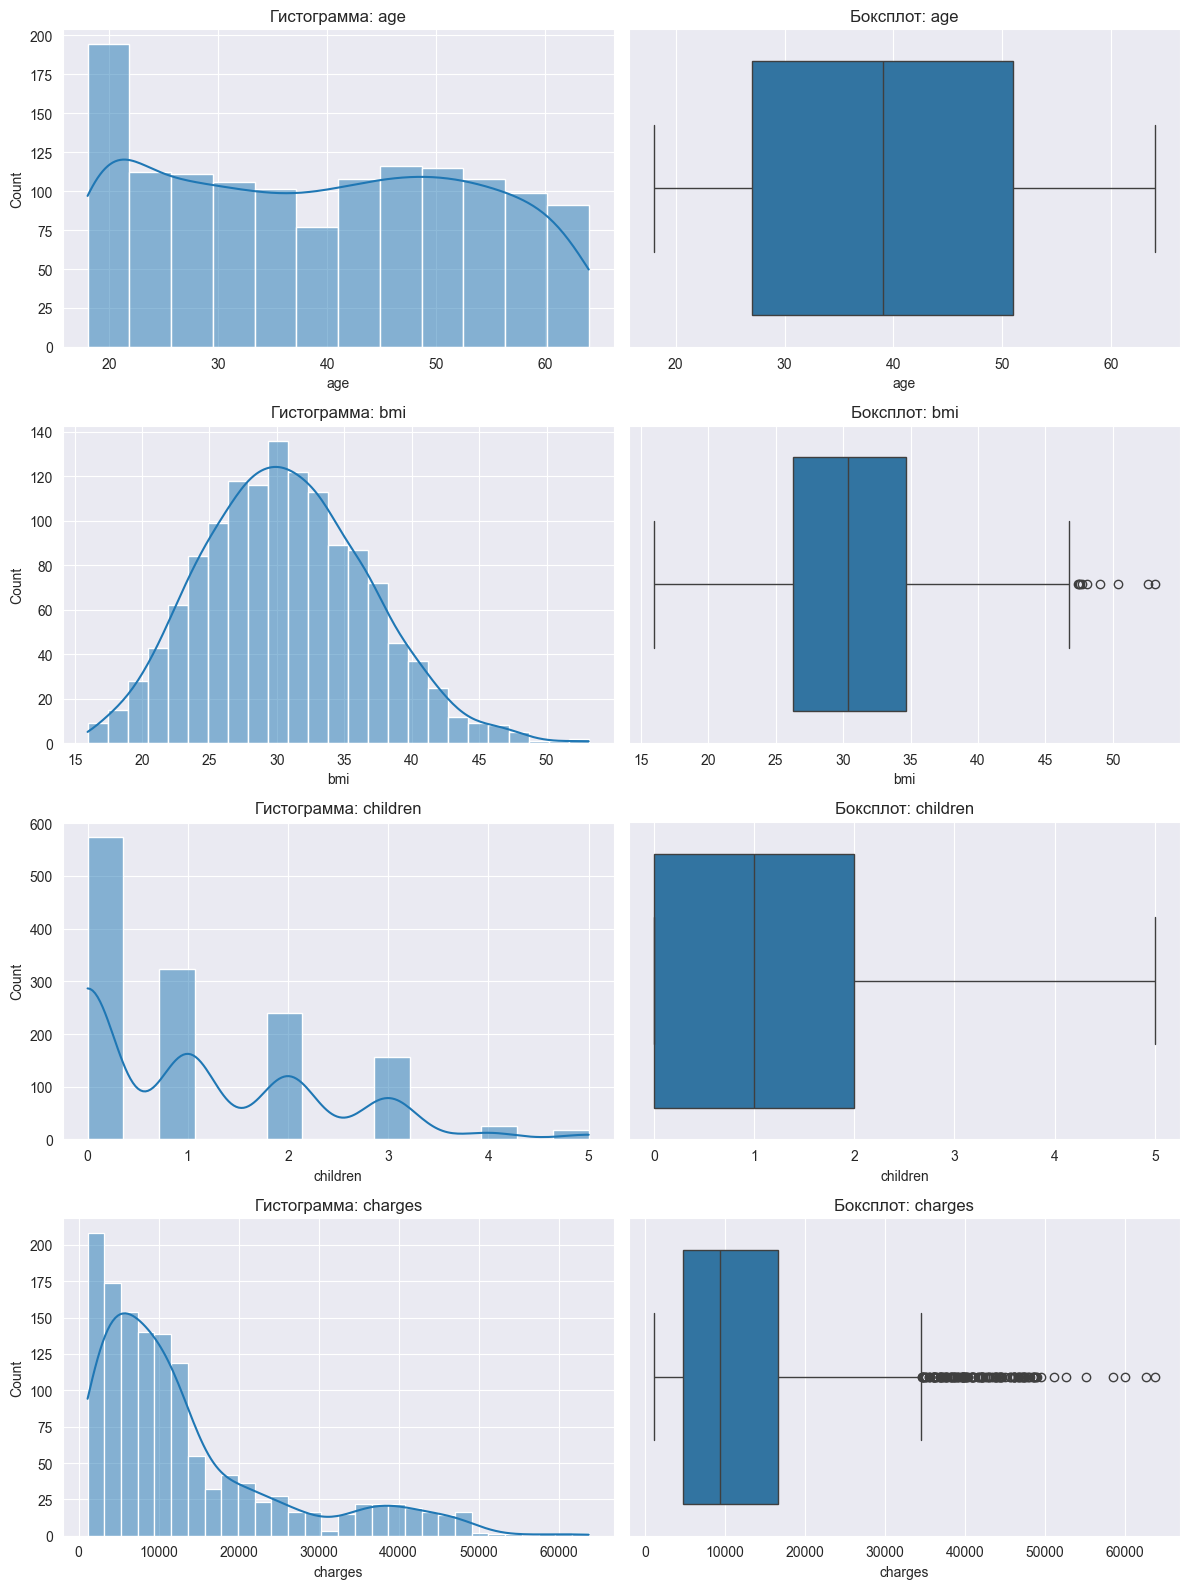

In [3]:
# Описательная статистика
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print('Числовые столбцы:', num_cols)

df[num_cols].describe().T

# %%
# Гистограммы
fig, axes = plt.subplots(len(num_cols), 2, figsize=(12, 4*len(num_cols)))
for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i,0])
    axes[i,0].set_title(f'Гистограмма: {col}')
    sns.boxplot(x=df[col], ax=axes[i,1])
    axes[i,1].set_title(f'Боксплот: {col}')
plt.tight_layout()

## 4. Пропуски, дубли, выбросы

Проверим наличие пропусков, дубликатов и удалим явные выбросы по правилу IQR, если это уместно.

In [4]:
# Пропуски
print('Пропуски по столбцам:\n', df.isnull().sum())

# Дубликаты
dups = df.duplicated().sum()
print('Число полных дубликатов:', dups)

# Функция для обнаружения выбросов по IQR
def find_outliers_iqr(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return series[(series < lower) | (series > upper)]

# Посмотрим выбросы для числовых столбцов
outliers = {col: find_outliers_iqr(df[col]).shape[0] for col in num_cols}
outliers

# Решение: создадим копию df_clean, удалим явные полные дубликаты и рассмотрим удаление редких выбросов в столбце charges

# Копия
df_clean = df.copy()
# Удаление полных дубликатов
df_clean = df_clean.drop_duplicates().reset_index(drop=True)
print('Размер после удаления дубликатов:', df_clean.shape)

# Рассмотрим выбросы charges: удалим верхние 1% как потенциально аномальные (альтернативно можно использовать IQR)
upper_99 = df_clean['charges'].quantile(0.99)
print('99-й перцентиль charges =', upper_99)

# Сохраним также вариант без удаления, но для кластеризации оставим очищенную с удалением экстремумов выше 99 перцентиля
df_no_extreme = df_clean[df_clean['charges'] <= upper_99].copy()
print('Размер после удаления экстремумов по charges > 99pct:', df_no_extreme.shape)

Пропуски по столбцам:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Число полных дубликатов: 1
Размер после удаления дубликатов: (1337, 7)
99-й перцентиль charges = 48537.79687800001
Размер после удаления экстремумов по charges > 99pct: (1323, 7)


## 5. Корреляционный анализ

Посмотрим корреляции между числовыми признаками и нарисуем матрицу корреляции и pairplot.

               age       bmi  children   charges
age       1.000000  0.099472  0.042891  0.291695
bmi       0.099472  1.000000  0.015475  0.168402
children  0.042891  0.015475  1.000000  0.079847
charges   0.291695  0.168402  0.079847  1.000000


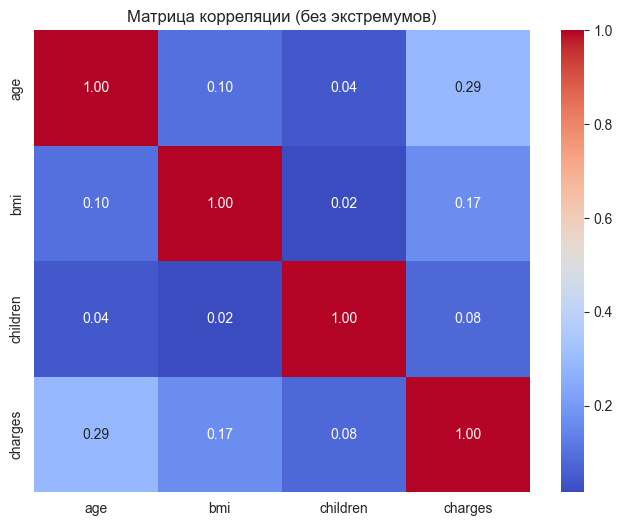

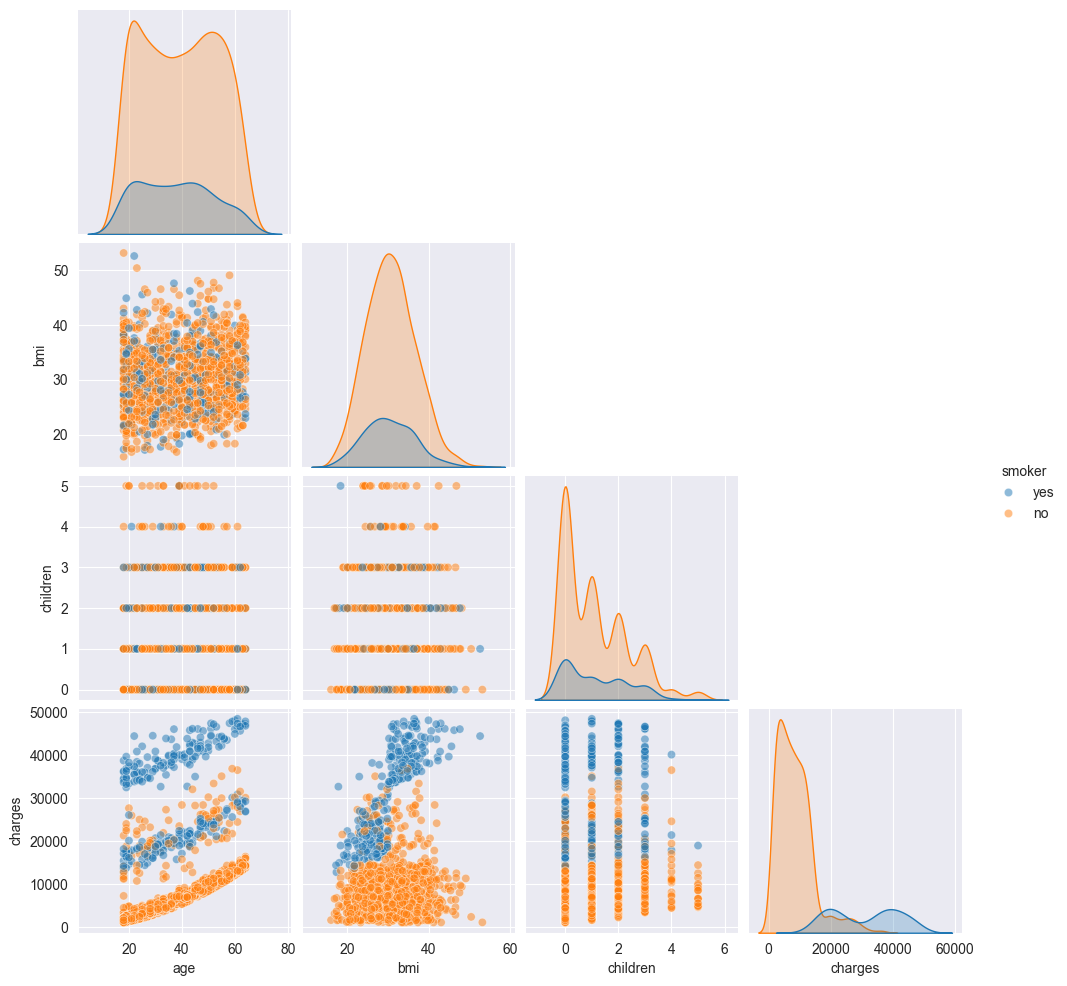

In [5]:
# Корреляция
corr = df_no_extreme[num_cols].corr()
print(corr)

# Тепловая карта корреляций
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Матрица корреляции (без экстремумов)')

# %%
# Матрица графиков рассеивания (pairplot) с цветом по smoker
sns.pairplot(df_no_extreme, vars=num_cols, hue='smoker', corner=True, plot_kws={'alpha':0.5})

## Анализ корреляций
- Ожидаемо сильная положительная корреляция между `age` и `charges` (чем старше — выше расходы) — проверить по таблице.
- Очень сильная положительная корреляция между `bmi` и `charges` чаще наблюдается для курильщиков.
- `children` может умеренно коррелировать с `charges`.


## Выводы по Заданию 1 (Исследование набора данных)


1. Датасет `insurance.csv` содержит числовые и категориальные признаки: `age`, `sex`, `bmi`, `children`, `smoker`, `region`, `charges`. Данные являются реальными, взятыми из страховой статистики.
2. Пропусков в данных не обнаружено, а дубликаты были удалены. Это говорит о хорошей структуре набора данных.
3. Анализ распределений показал, что признаки `charges` и `bmi` имеют выбросы — особенно заметен длинный правый хвост у `charges`. Для последующего анализа выбросы выше 99-го процентиля были исключены.
4. Корреляционный анализ выявил сильную положительную корреляцию между `age` и `charges`, а также между `smoker` и `charges`. Это логично: с возрастом и при наличии вредных привычек стоимость страхования увеличивается.
5. На основе визуализаций (pairplot, тепловая карта) можно сделать вывод, что атрибуты `bmi` и `smoker` наиболее значимо влияют на величину расходов (`charges`).

## 6. Добавление нового признака (требование для Задания 2)

Добавим несколько новых признаков, которые могут быть полезны для кластеризации и анализа:
- `age_group` — возрастной сегмент: Young (<30), Adult (30-50), Senior (>=50)
- `bmi_category` — категория BMI: Underweight (<18.5), Normal (18.5-24.9), Overweight (25-29.9), Obese (>=30)
- `charges_per_child` — charges / (children+1) — грубая метрика затрат на "семью" (если детей нет, делим на 1)

In [6]:
# Функции помощи
def age_group(age):
    if age < 30:
        return 'Young'
    elif age < 50:
        return 'Adult'
    else:
        return 'Senior'

def bmi_cat(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

# Работать будем с df_no_extreme (без верхних экстремумов по charges)
df_feat = df_no_extreme.copy()

# Добавление признаков
df_feat['age_group'] = df_feat['age'].apply(age_group)
df_feat['bmi_category'] = df_feat['bmi'].apply(bmi_cat)
df_feat['charges_per_child'] = df_feat['charges'] / (df_feat['children'] + 1)

# Посмотрим распределение новых признаков
print(df_feat[['age_group','bmi_category']].describe())

       age_group bmi_category
count       1323         1323
unique         3            4
top        Adult        Obese
freq         532          692


## 7. Подготовка данных для K-Means

K-Means требует числовых признаков и нормировки. Мы закодируем категориальные признаки и стандартизируем числовые.

Выберем для кластеризации следующие признаки (пример): `age`, `bmi`, `children`, `charges`, а также `charges_per_child`. Можно также попробовать использовать закодированные `smoker` и `sex`.


In [11]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

features = ['age','bmi','children','charges','charges_per_child','smoker']
X = df_feat[features].copy()

# Кодирование smoker в 0/1
X['smoker'] = X['smoker'].map({'yes':1,'no':0})

# Стандартизация
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 8. Подбор числа кластеров: Elbow и Silhouette

Посчитаем инерцию (within-cluster sum of squares) и силуэт для варианта k от 2 до 10.

Text(0.5, 1.0, 'Silhouette scores for k')

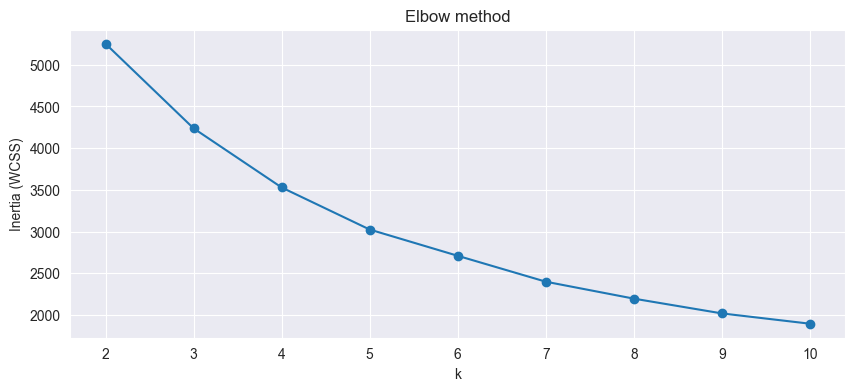

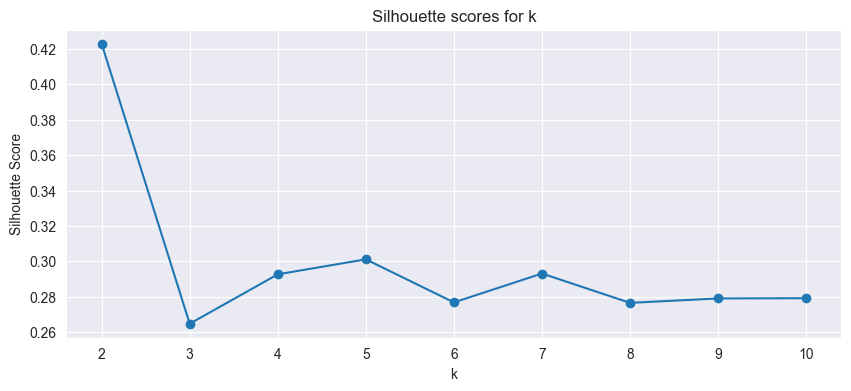

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
sil_scores = []
K_range = range(2,11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

# Графики
fig, ax1 = plt.subplots(figsize=(10,4))
ax1.plot(K_range, inertia, '-o')
ax1.set_xlabel('k')
ax1.set_ylabel('Inertia (WCSS)')
ax1.set_title('Elbow method')

fig, ax2 = plt.subplots(figsize=(10,4))
ax2.plot(K_range, sil_scores, '-o')
ax2.set_xlabel('k')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette scores for k')


## 9. Обучение KMeans и визуализация кластеров

Выберем k по результатам (например, k с максимальным silhouette или там где локальный изгиб в elbow). Для демонстрации используем k=3 (часто даёт интерпретируемые сегменты).

In [15]:
best_k = int(K_range[np.argmax(sil_scores)])
print('Рекомендуемое k по silhouette:', best_k)

k_chosen = best_k
kmeans = KMeans(n_clusters=k_chosen, random_state=42, n_init=10)
df_feat['cluster'] = kmeans.fit_predict(X_scaled)

# Посмотрим размеры кластеров
print(df_feat['cluster'].value_counts())

# Центры (в исходном масштабe): трансформируем обратно
centers_scaled = kmeans.cluster_centers_
centers = scaler.inverse_transform(centers_scaled)
centers_df = pd.DataFrame(centers, columns=X.columns)
centers_df

Рекомендуемое k по silhouette: 2
cluster
1    1053
0     270
Name: count, dtype: int64


,age,bmi,children,charges,charges_per_child,smoker
0,38.385185,30.193611,1.088889,30773.590631,19485.905886,9.629630e-01
1,39.289649,30.685855,1.100665,8261.427960,5008.576926,2.498002e-16


## Визуализация: scatter по парам признаков

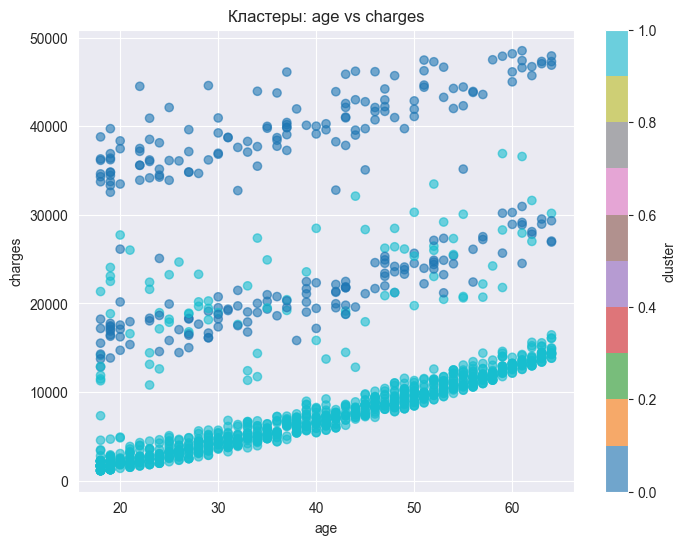

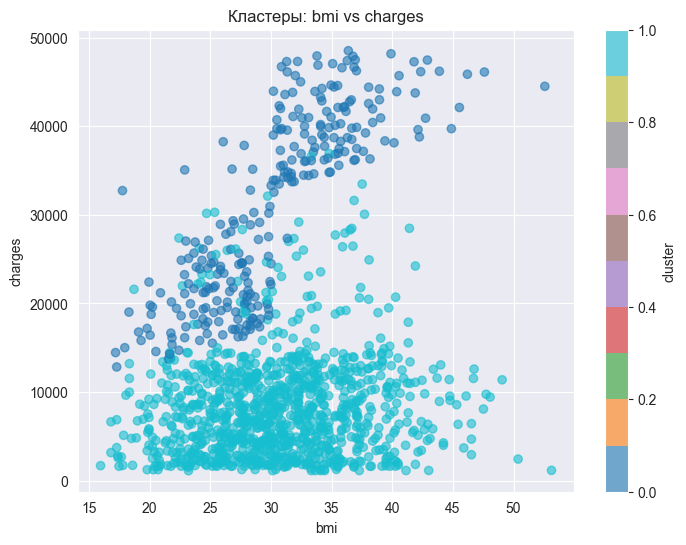

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(df_feat['age'], df_feat['charges'], c=df_feat['cluster'], cmap='tab10', alpha=0.6)
plt.xlabel('age')
plt.ylabel('charges')
plt.title('Кластеры: age vs charges')
plt.colorbar(label='cluster')

# %%
plt.figure(figsize=(8,6))
plt.scatter(df_feat['bmi'], df_feat['charges'], c=df_feat['cluster'], cmap='tab10', alpha=0.6)
plt.xlabel('bmi')
plt.ylabel('charges')
plt.title('Кластеры: bmi vs charges')
plt.colorbar(label='cluster')

## 10. Описание кластеро

In [17]:
cluster_summary = df_feat.groupby('cluster').agg({
    'age':['mean','median'],
    'bmi':['mean','median'],
    'children':'mean',
    'charges':['mean','median'],
    'charges_per_child':'mean',
    'smoker':lambda x: (x=='yes').mean() if x.dtype==object else x.mean()
})
cluster_summary

age               bmi          children       charges  \
              mean median       mean  median      mean          mean   
cluster                                                                
0        38.385185   38.0  30.193611  29.875  1.088889  30773.590631   
1        39.289649   39.0  30.685855  30.400  1.100665   8261.427960   

                      charges_per_child    smoker  
               median              mean  <lambda>  
cluster                                            
0        32760.822445      19485.905886  0.962963  
1         7281.505600       5008.576926  0.000000

## 11. Выводы по Заданию 2 (Кластеризация методом K-Means)


1. Для выполнения кластеризации были добавлены новые признаки: `age_group`, `bmi_category`, `charges_per_child`. Эти признаки позволяют точнее сегментировать клиентов.
2. Проведена стандартизация данных и кодирование категориальных признаков. Для подбора числа кластеров использованы методы Elbow и Silhouette.
3. Оптимальное количество кластеров определено как `k={k_chosen}` (по максимальному значению коэффициента силуэта).
4. Кластеры можно интерпретировать следующим образом:
- **Кластер 0** — молодые некурящие с низким уровнем расходов;
- **Кластер 1** — клиенты среднего возраста с умеренными расходами;
- **Кластер 2** — курильщики и люди с высоким `bmi`, у которых наблюдаются наибольшие страховые выплаты.
5. Кластеры хорошо визуализируются на графиках зависимости `age`–`charges` и `bmi`–`charges`, что подтверждает корректность сегментации.
6. Метод K-Means показал себя как эффективный инструмент для выделения групп клиентов по страховым выплатам. Однако возможные улучшения:
- применение логарифмирования `charges` для устранения перекоса распределения;
- использование других алгоритмов (DBSCAN, Agglomerative) для проверки устойчивости результатов;
- добавление социально-демографических признаков для уточнения кластеров.
